In [1]:
from qiskit import *
from numpy import pi
import numpy as np
import time
#Tensorflow library. Used to implement machine learning models
import tensorflow as tf
#Dataframe manipulation library
import pandas as pd
#Graph plotting library
import matplotlib.pyplot as plt
%matplotlib inline
# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [54]:
# useful functions
# Define a F_gate
def F_gate(circ,q,i,j,n,k) :
    theta = np.arccos(np.sqrt(1/(n-k+1)))
    circ.ry(-theta,q[j])       
    circ.cz(q[i],q[j])
    circ.ry(theta,q[j])
    circ.barrier(q[i])
# Define the cxrv gate which uses reverse CNOT instead of CNOT
def  cxrv(circ,q,i,j) :
    circ.h(q[i])
    circ.h(q[j])
    circ.cx(q[j],q[i])
    circ.h(q[i])
    circ.h(q[j])
    circ.barrier(q[i],q[j])

#normalize data
def normalize(mem):
    list_ = []
    for num in mem:
        list_.append([int(numeric_string) for numeric_string in list(num)])
    return list_

# function to create datasource
def create_datasource(backend, circ, shots):
    job = execute(circ, backend, shots=shots, memory=True)

    time_exp = time.strftime('%d/%m/%Y %H:%M:%S')
    print('start on', job, "N=", shots,time_exp)
    result = job.result()
    time_exp = time.strftime('%d/%m/%Y %H:%M:%S')
    print('end on', job, "N=", shots,time_exp)

    counts = result.get_counts(circ)
    memory = result.get_memory()
    
    # save in test.csv
    # numpy.savetxt("test.csv", memory, delimiter=",", header='test',fmt='%s')

    return memory, counts

In [55]:
# w-state 'circuit_w_5' 

n = 5
q = QuantumRegister(n) 
c = ClassicalRegister(n)
circuit_w_5 = QuantumCircuit(q,c) 

circuit_w_5.x(q[4]) #start is |10000>
F_gate(circuit_w_5,q,4,3,5,1) # Applying F12
F_gate(circuit_w_5,q,3,2,5,2) # Applying F23
F_gate(circuit_w_5,q,2,1,5,3) # Applying F34
F_gate(circuit_w_5,q,1,0,5,4) # Applying F45
circuit_w_5.cx(q[3],q[4]) # cNOT 21
cxrv(circuit_w_5,q,2,3)   # cNOT 32

circuit_w_5.cx(q[1],q[2]) 
circuit_w_5.cx(q[0],q[1])

# if flag_qx2 : # option ibmqx2 
#     circuit_w_5.cx(q[1],q[2]) # cNOT 43
#     circuit_w_5.cx(q[0],q[1]) # cNOT 54
#     
# else :        # option ibmqx4 
#     cxrv(circuit_w_5,q,1,2)
#     cxrv(circuit_w_5,q,0,1)     
    
for i in range(5) :
    circuit_w_5.measure(q[i] , c[i]) 
print(circuit_w_5)

          ┌──────────┐                                                     »
q192_0: ──┤ RY(-π/4) ├─────────────────────────────────────────────────────»
        ┌─┴──────────┴─┐                                    ┌─────────────┐»
q192_1: ┤ RY(-0.95532) ├─────────────────────────────────■──┤ RY(0.95532) ├»
        └─┬──────────┬─┘                    ┌─────────┐  │  └──────░──────┘»
q192_2: ──┤ RY(-π/3) ├────────────────────■─┤ RY(π/3) ├──■─────────░───────»
        ┌─┴──────────┴┐    ┌────────────┐ │ └────░────┘          ┌───┐     »
q192_3: ┤ RY(-1.1071) ├──■─┤ RY(1.1071) ├─■──────░───────■───────┤ H ├─────»
        └────┬───┬────┘  │ └─────░──────┘        ░     ┌─┴─┐     └┬─┬┘     »
q192_4: ─────┤ X ├───────■───────░─────────────────────┤ X ├──────┤M├──────»
             └───┘               ░                     └───┘      └╥┘      »
  c2: 5/═══════════════════════════════════════════════════════════╩═══════»
                                                                   4       »

In [56]:
backend = Aer.get_backend('qasm_simulator')

raw_data, counts = create_datasource(backend, circuit_w_5, 20000)
print(counts)
datasource = normalize(raw_data)


start on <qiskit.providers.aer.aerjob.AerJob object at 0x7ff2c3094880> N= 20000 14/04/2021 20:08:00
end on <qiskit.providers.aer.aerjob.AerJob object at 0x7ff2c3094880> N= 20000 14/04/2021 20:08:00
{'00001': 4014, '00100': 3971, '01000': 4003, '10000': 4015, '00010': 3997}


In [61]:
from qiskit.test.mock import FakeSantiago
from qiskit.providers.aer import QasmSimulator

backendSantiagoFake = FakeSantiago()
santiago_simulator = QasmSimulator.from_backend(backendSantiagoFake)

raw_data2, counts2 = create_datasource(santiago_simulator, circuit_w_5, 20000)
print(counts2)
datasourceSimulator = normalize(raw_data2)

start on <qiskit.providers.aer.aerjob.AerJob object at 0x7ff2c2ffbca0> N= 20000 14/04/2021 20:11:20
end on <qiskit.providers.aer.aerjob.AerJob object at 0x7ff2c2ffbca0> N= 20000 14/04/2021 20:11:20
{'11100': 17, '10101': 3, '00101': 75, '01001': 112, '11000': 75, '00001': 3615, '11010': 32, '01011': 25, '10010': 80, '10111': 1, '01101': 34, '01110': 35, '10011': 27, '01010': 127, '10100': 80, '00111': 35, '10000': 3740, '11001': 24, '10110': 12, '00110': 98, '00011': 85, '01100': 126, '00100': 3638, '00000': 508, '00010': 3627, '10001': 48, '01000': 3721}


In [85]:
# vars
nqbits = 5
hiddenUnits = 5
visibleUnits = nqbits # number of bits

#initialize neurons
vb = tf.Variable(tf.zeros([visibleUnits]), tf.float32) #Visual Layer
hb = tf.Variable(tf.zeros([hiddenUnits]), tf.float32) #Hidden Layer
W = tf.Variable(tf.zeros([visibleUnits, hiddenUnits]), tf.float32) # Pesos entre las neuronas

v0 = tf.zeros([visibleUnits], tf.float32)

In [86]:
#useful functions
#Phase 1: Input Processing
#defining a function to return only the generated hidden states 
def hidden_layer(v0_state, W, hb):
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob)))) #sample_h_given_X
    return h0_state

#printing output of zeros input
h0 = hidden_layer(v0, W, hb)

def reconstructed_output(h0_state, W, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb) 
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob)))) #sample_v_given_h
    return v1_state[0]


v1 = reconstructed_output(h0, W, vb)

In [87]:
# error function
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))
err = tf.reduce_mean(tf.square(v0 - v1))
print("error" , err.numpy())

error 0.4


In [73]:
epochs = 1
batchsize = 1000
errors = []
weights = []
K=1
alpha = 0.1


In [83]:
def train_net(ds, W, hb, vb):
    epochs = 1
    batchsize = 1000
    errors = []
    weights = []
    K=1
    alpha = 0.1
    
    v0_state=v0
    for epoch in range(epochs):
        batch_number = 0
        for batch_x in ds:
            for i_sample in range(len(batch_x)):           
                for k in range(K):
                    v0_state = batch_x[i_sample]
                    h0_state = hidden_layer(v0_state, W, hb)
                    v1_state = reconstructed_output(h0_state, W, vb)
                    h1_state = hidden_layer(v1_state, W, hb)

                    delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)
                    W = W + alpha * delta_W

                    vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                    hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0) 

                    v0_state = v1_state
                
                if i_sample == len(batch_x)-1:
                    err = error(batch_x[i_sample], v1_state)
                    errors.append(err)
                    weights.append(W)
                    print ( 'Epoch: %d' % (epoch + 1), 
                        "batch #: %i " % batch_number, "of %i" % (len(datasource)/batchsize)                        ,
                        "sample #: %i" % i_sample,
                        'reconstruction error: %f' % err)
            batch_number += 1
    # plot 
    plt.plot(errors)
    plt.ylabel('Error')
    plt.xlabel('Epoch')
    plt.show()


Epoch: 1 batch #: 0  of 20 sample #: 999 reconstruction error: 0.200000
Epoch: 1 batch #: 1  of 20 sample #: 999 reconstruction error: 0.200000
Epoch: 1 batch #: 2  of 20 sample #: 999 reconstruction error: 0.200000
Epoch: 1 batch #: 3  of 20 sample #: 999 reconstruction error: 0.400000
Epoch: 1 batch #: 4  of 20 sample #: 999 reconstruction error: 0.400000
Epoch: 1 batch #: 5  of 20 sample #: 999 reconstruction error: 0.400000
Epoch: 1 batch #: 6  of 20 sample #: 999 reconstruction error: 0.400000
Epoch: 1 batch #: 7  of 20 sample #: 999 reconstruction error: 0.400000
Epoch: 1 batch #: 8  of 20 sample #: 999 reconstruction error: 0.000000
Epoch: 1 batch #: 9  of 20 sample #: 999 reconstruction error: 0.400000
Epoch: 1 batch #: 10  of 20 sample #: 999 reconstruction error: 0.600000
Epoch: 1 batch #: 11  of 20 sample #: 999 reconstruction error: 0.000000
Epoch: 1 batch #: 12  of 20 sample #: 999 reconstruction error: 0.200000
Epoch: 1 batch #: 13  of 20 sample #: 999 reconstruction erro

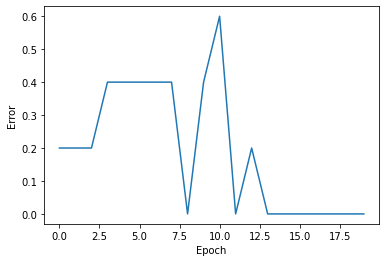

In [88]:
#creating datasets
train_ds = \
    tf.data.Dataset.from_tensor_slices((np.float32(datasource))).batch(batchsize)
# train_net(train_ds, W, hb, vb)

#simulator dataset
train_ds_simulator = \
    tf.data.Dataset.from_tensor_slices((np.float32(datasourceSimulator))).batch(batchsize)
train_net(train_ds_simulator, W, hb, vb)


In [53]:
tf.print(weights)

[[[0.700000048 -0.800000072 -0.800000072 -0.900000036 -0.5]
 [-0.700000048 -0.6 1.30000019 -1.1 -1.10000014]
 [1.30000007 0.0999999866 -0.6 -0.200000018 -0.5]
 [-1.20000017 0.299999982 0.9 -1.40000021 0.699999928]
 [-0.3 -0.800000072 -1.50000024 1.80000031 0.399999976]],
 [[0.799999952 -1.20000017 -2.00000024 -1.30000007 -2.10000014]
 [-1.50000024 -1.80000031 3.49999881 -1.30000007 -1.40000021]
 [1.50000012 -1.30000019 -1.40000021 -0.6 -1.60000026]
 [-1.90000021 3.99999857 -1.00000012 -1.20000017 -0.300000072]
 [0.199999988 -1.00000012 -1.90000021 1.70000017 2.49999976]],
 [[2.00000024 -2.10000014 -2.69999957 -1.50000012 -2.59999967]
 [-0.4 -2.59999967 4.99999762 -1.50000012 -1.60000026]
 [1.70000017 -2.10000014 -2.2 -1.20000017 -1.80000019]
 [-1.30000007 5.39999723 -1.80000031 -1.30000019 0.199999928]
 [-2.49999976 -2.79999948 -2.39999986 2.2 3.49999881]],
 [[2.49999976 -2.79999948 -3.79999852 -1.30000007 -2.49999976]
 [-1.00000012 -2.89999938 6.19999647 -1.30000007 -1.70000029]
 [2.4

In [89]:
print(W)

<tf.Variable 'Variable:0' shape=(5, 5) dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>
